In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

# Getting Data 

In [2]:
data = pd.read_csv("Bengaluru_House_Data_m.csv")

In [3]:
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [4]:
data.shape

(13320, 9)

In [5]:
data.groupby("area_type")["area_type"].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
2418 + 87 + 2025 + 8790

13320

In [7]:
data =  data.drop(["area_type", "availability", "society", "balcony"], axis = 1)

In [8]:
data.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


#  Data cleaning

In [9]:
data.isna().any()

location       True
size           True
total_sqft    False
bath           True
price         False
dtype: bool

In [10]:
data.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
data = data.dropna()
data.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
data['bhk'] = data['size'].apply([lambda x: int(x.split()[0])])

In [14]:
data['bhk'].head()

0    2
1    4
2    3
3    3
4    2
Name: bhk, dtype: int64

In [15]:
data.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [16]:
data[data.bhk > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [17]:
data.total_sqft.unique()[0]

'1056'

In [18]:
type(data.total_sqft.unique()[0])

str

In [19]:
def is_float(x):
    
    try:
        float(x)
        
    except:
        return False
    return True

In [20]:
data[~data.total_sqft.apply(is_float)].head()   #~ tis is used for negate operation

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [21]:
def convert_sq_ft_num(x):
    
    tokens = x.split("-")
    
    if len(tokens) == 2:
        return ((float(tokens[0]) + float(tokens[1]))/2)
    try:
        return float(x)
    except:
        return None
    

In [22]:
 data['total_sqft'] = data.total_sqft.apply(convert_sq_ft_num)

In [23]:
data.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [24]:
	2100 + 2850	

4950

In [25]:
4950/2

2475.0

In [26]:
data["price_per_sqft"] = data["price"]*100000/data["total_sqft"]

In [27]:
data.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [28]:
len(data.location.unique())

1304

In [29]:
data.location = data.location.apply([lambda x: x.strip()])

location_stats = data.groupby("location")['location'].agg('count')
location_stats.sort_values(ascending=False)

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [30]:
len(location_stats[location_stats <= 10])

1052

In [31]:
locatio_stats_less_10 = location_stats[location_stats <= 10].sort_values(ascending=False)

In [32]:
data.location = data.location.apply([lambda x: 'other' if x in locatio_stats_less_10 else x])

In [33]:
len(data.location.unique())   #out 1052 now we have only 242 categories for location

242

In [34]:
data.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [35]:
data.location[data.location == "other"].head()

9     other
18    other
19    other
25    other
42    other
Name: location, dtype: object

In [36]:
data.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


### Removing outliers using domain knowledge

In [37]:
data.shape

(13246, 7)

In [38]:
data = data[~(data.total_sqft/data.bhk < 300)]

In [39]:
data.shape          #we removed some unnecessary items 

(12502, 7)

In [40]:
data.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [41]:
def remove_outliers(df):
    df_outl = pd.DataFrame()
    
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        sd = np.std(subdf.price_per_sqft)
        
        reduced_df = subdf[(subdf.price_per_sqft > (m-sd)) & (subdf.price_per_sqft <= (m + sd))]
        
        df_outl = pd.concat([df_outl, reduced_df], ignore_index=True)
        
    return df_outl
    
data_df = remove_outliers(data)

In [42]:
data_df.shape

(10241, 7)

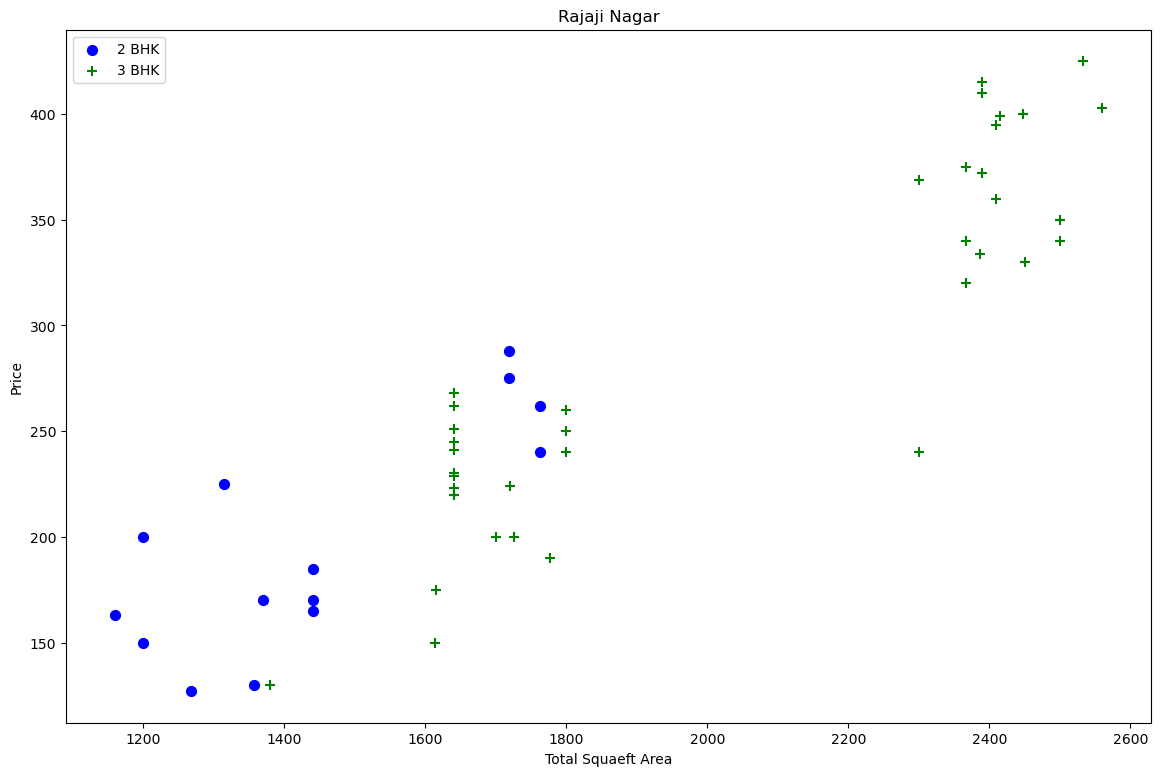

In [43]:
def plot_scatter_plot(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    
    plt.figure(figsize=(14, 9))
    
    plt.scatter(bhk2.total_sqft, bhk2.price, color = "blue", label = "2 BHK", s = 50)
    
    plt.scatter(bhk3.total_sqft, bhk3.price, color = "green", marker="+", label = "3 BHK", s = 50)
    
    plt.title(location)
    plt.xlabel("Total Squaeft Area")
    plt.ylabel("Price")
    
    plt.legend()
    
    
    
    
plot_scatter_plot(data_df, "Rajaji Nagar")   

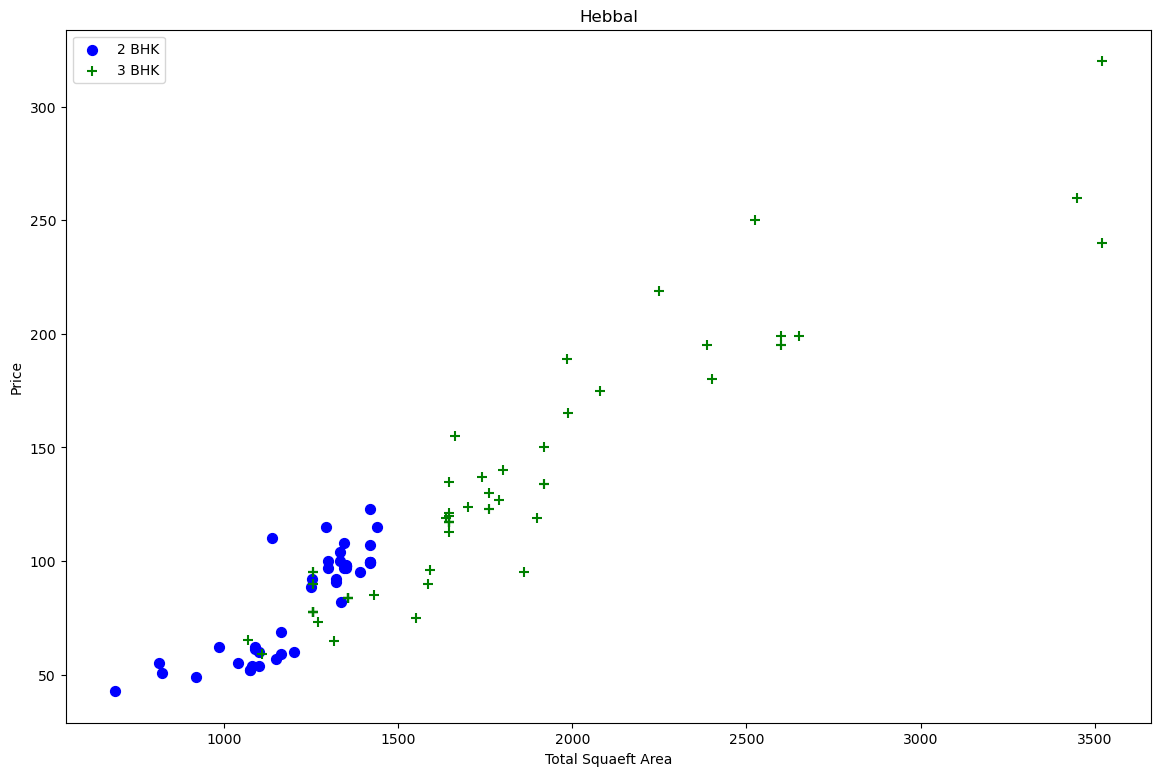

In [44]:
plot_scatter_plot(data_df, "Hebbal")

In [45]:
def remove_bhk_outliers(df):
    
    exclude_idices = np.array([])
    
    for location, location_df in df.groupby("location"):
        bhk_stats = {}
            
        for bhk, bhk_df in location_df.groupby("bhk"):
            bhk_stats[bhk] = {

                'mean' : np.mean(bhk_df.price_per_sqft),
                'std'  : np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
            
        for bhk, bhk_df in location_df.groupby("bhk"):
            stats = bhk_stats.get(bhk-1)

            if stats and stats['count'] > 5:
                exclude_idices = np.append(exclude_idices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)

    return df.drop(exclude_idices, axis= 'index')
    
data_df0 = remove_bhk_outliers(data_df)
data_df0.shape   

(7329, 7)

In [46]:
data.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


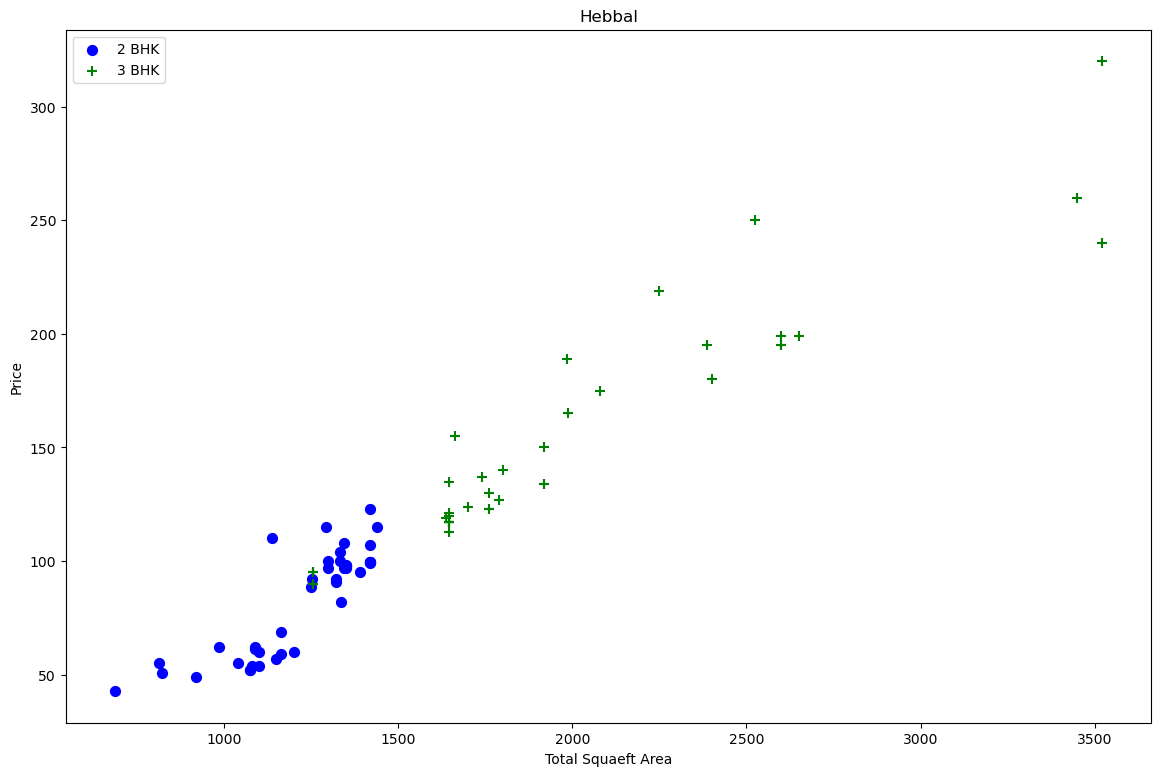

In [47]:
plot_scatter_plot(data_df0, "Hebbal") 

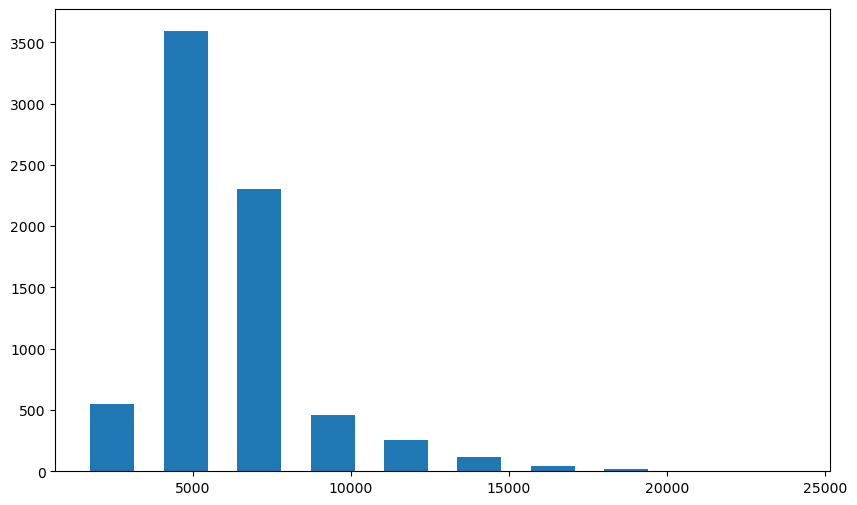

In [48]:
plt.figure(figsize=(10, 6))
plt.hist(data_df0.price_per_sqft, rwidth=0.6)
plt.show()

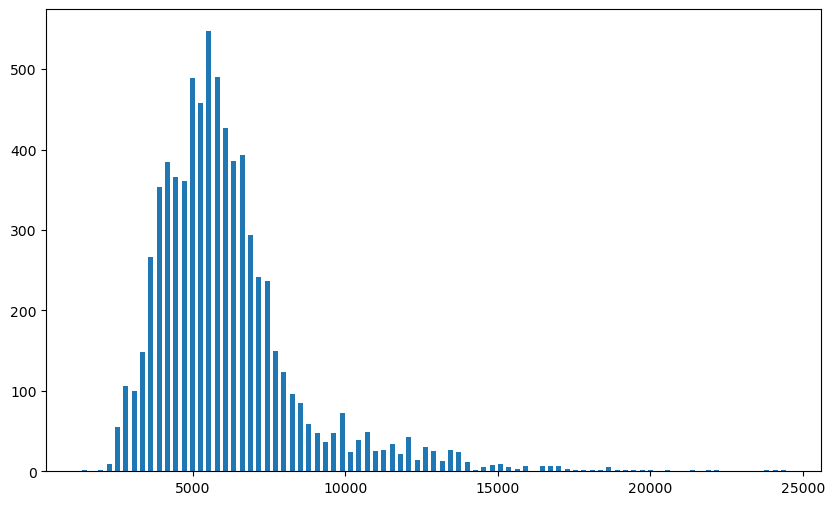

In [49]:
plt.figure(figsize=(10, 6))
plt.hist(data_df0.price_per_sqft, bins = 85,  rwidth=0.6)
plt.show()

In [50]:
#np.sqrt(7329)  max num of bins can be potted by this squarerooth methds (squareroot of num of datapoints)

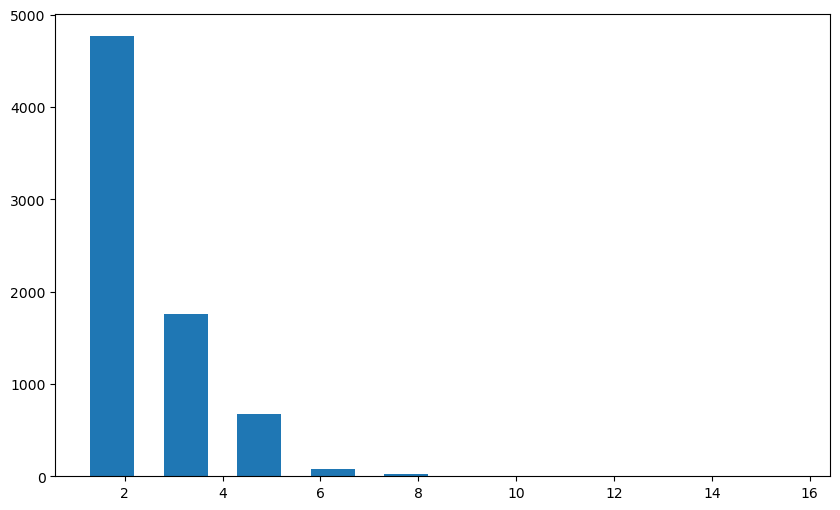

In [51]:
plt.figure(figsize=(10, 6))
plt.hist(data_df0.bath,   rwidth=0.6)
plt.show()

In [52]:
data_df1 = data_df0[data_df0.bath < data_df0.bhk + 2]

In [53]:
data_df1.shape

(7251, 7)

In [54]:
data_df1 = data_df1.drop(['size', 'price_per_sqft'], axis = 1)

In [55]:
data_df1.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [56]:
dummies = pd.get_dummies(data_df1.location)

In [57]:
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
data_df2 =  pd.concat([data_df1,  dummies.drop('other', axis="columns")], axis='columns')

In [59]:
data_df2.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
data_df2.drop('location', axis=1, inplace=True)

In [61]:
data_df2.shape

(7251, 245)

In [62]:
features = data_df2.drop('price', axis = 1)

In [63]:
features.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
target = data_df2.price

In [65]:
target.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [66]:
features = data_df2.drop('price', axis = 1)
target = data_df2.price


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)


In [67]:
X_train.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
6646,1564.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7353,3200.0,4.0,4,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7622,2444.0,4.0,4,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1840,1107.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7652,1400.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [68]:
y_train

6646    105.0
7353    224.0
7622    145.0
1840     44.0
7652     78.0
        ...  
1424     60.0
4293    110.0
1623     40.0
5720    215.0
1562     35.0
Name: price, Length: 5800, dtype: float64

In [69]:
regr = LinearRegression()


regr.fit(X_train, y_train)
y_pred = regr.predict(X_train)

In [70]:
regr.score(X_test, y_test)

0.845227769787429

#### cross validation

In [71]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
cross_val_score(LinearRegression(), features, target, cv=cv)

array([0.84522777, 0.80004632, 0.88682995, 0.842265  , 0.86250633])

In [73]:
#we are getting score more that 80 for linear regression

In [74]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor


def find_best_model_using_gridsearchcv(X, y):
    algos = {
        "linear_regression": {
            "model": LinearRegression(),
            "params":{
                "normalize":[True, False]
            }
        },
        
        'lasso':{
            "model": Lasso,
            "params": {
                "alpha": [1, 2],
                "selection": ["random", "cyclic"]
            }
        },
        
        "decision_tree": {
            "model":DecisionTreeRegressor(),
            "params": {
                "creiteria": ['mse', 'frienman_mse'],
                "splitter": ["best", "random"]
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_names, config in algos.items():
        
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_names,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        
        return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [75]:
find_best_model_using_gridsearchcv(features, target)

C:\Users\amar\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\amar\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = m

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': True}


In [76]:
features.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [79]:
def predict_price(location, sqrt, bath, bhk):
    
    loc_index = np.where(features.columns == location)[0][0]
    
    x = np.zeros(len(features.columns))
    
    x[0] = sqrt
    x[1] = bath
    x[2] = bhk
    
    if loc_index >= 0:
        x[loc_index] = 1
        
    return regr.predict([x])[0]
    
    

In [80]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)  #price is in lacks Rupees

C:\Users\amar\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.49904677172415

In [81]:
predict_price('6th Phase JP Nagar', 1000, 2, 2)

C:\Users\amar\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


62.872010319637255

In [87]:
import pickle
with open("banglore_house_price.pkl", "wb") as file:
    pickle.dump(regr, file)

In [83]:
import json
columns = {
    "data_columns": [col.lower() for col in features.columns]
}

In [84]:
with open("columns.json", "w") as f:
     f.write(json.dumps(columns))
  

In [85]:
with open("column_names.json", "w") as file:
    json.dump({"columns": [col.lower() for col in features.columns]}, file)

In [ ]:
import pickle

## For API

In [78]:
sqrt     = 1000
bath     = 2
bhk      = 2
location = '1st Phase JP Nagar'

In [83]:
test_array = np.zeros(len(features.columns))
    
test_array[0] = sqrt
test_array[1] = bath
test_array[2] = bhk
idx_loc = list(features.columns).index(location)
test_array[idx_loc] = 1

In [84]:
test_array

array([1000.,    2.,    2.,    0.,    1.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,

In [86]:
regr.predict([test_array])

C:\Users\amar\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([83.49904677])